In [1]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import collections
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier


%matplotlib inline
import os

In [3]:
df=pd.read_csv('pca_data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.538430,0.457871,0.217406,-0.202846,-0.023973,-0.246857,-0.332608,0.245690,0.762651,-0.795020,-0.450454,-0.393026,0.017330,-0.003406,0.102550,0.0
1,-0.455548,-0.007590,0.226425,-0.187979,-0.020580,-0.217545,-0.213761,0.090946,0.273711,-0.102472,0.086123,0.143814,-0.098653,0.033998,-0.202744,0.0
2,-0.460422,-0.299343,-0.163764,0.221461,-0.888680,-0.212497,-0.715448,1.706122,-1.109118,-1.743701,1.800928,0.852335,0.018982,-0.093837,0.031382,0.0
3,-0.551961,-0.016130,-0.241888,-0.032486,-1.065190,-0.105483,-0.732380,2.092480,-0.915563,-2.610767,2.026120,0.823329,0.093891,-0.309899,0.156194,0.0
4,-0.485033,-0.286505,-0.203140,-0.024412,-1.094581,-0.103044,-0.688671,2.045553,-1.220812,-2.332024,2.418861,1.124070,0.060865,-0.295249,0.012482,0.0


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,4.107000e+03,4.107000e+03,4.107000e+03,4.107000e+03,4.107000e+03,4.107000e+03,4.107000e+03,4.107000e+03,4.107000e+03,4.107000e+03,4.107000e+03,4.107000e+03,4.107000e+03,4.107000e+03,4.107000e+03,4107.000000
mean,6.039051e-17,-5.784946e-17,-1.516521e-16,-5.255110e-17,3.087107e-17,1.505708e-16,4.893551e-17,-1.495436e-16,-8.061079e-17,-3.915651e-17,-5.103728e-17,-3.460155e-18,-7.569088e-19,5.136167e-18,-6.247877e-17,0.666667
std,9.643492e-01,7.365535e-01,6.693446e-01,5.820830e-01,5.508160e-01,5.261171e-01,5.075642e-01,4.660804e-01,4.433095e-01,4.235885e-01,4.043971e-01,3.770567e-01,3.695371e-01,3.647639e-01,3.540434e-01,0.471462
min,-1.348049e+00,-5.011534e-01,-4.816547e+00,-4.432650e+00,-2.718917e+00,-2.431630e+00,-7.698394e-01,-1.680001e+00,-1.874138e+00,-2.610767e+00,-1.547961e+00,-1.151894e+00,-2.545177e+00,-4.135093e+00,-2.307533e+00,0.000000
25%,-4.088329e-01,-2.815306e-01,-8.859013e-02,-4.515803e-02,-1.594930e-01,-1.640938e-01,-2.168285e-01,-2.628755e-01,-2.756014e-01,-9.490248e-02,-1.082300e-01,-2.540423e-01,-3.776902e-02,-2.538707e-02,-4.573471e-02,0.000000
50%,-3.545521e-01,-2.483050e-01,1.830219e-01,4.719592e-02,1.474821e-01,-9.396970e-02,-1.249190e-01,-1.257053e-02,1.132372e-01,1.004489e-01,3.733492e-02,6.612169e-02,-9.745236e-03,1.534997e-02,1.830378e-02,1.000000
75%,-3.226783e-01,7.203271e-02,2.379411e-01,9.817903e-02,2.507852e-01,1.701398e-01,1.003249e-01,1.965108e-01,2.463594e-01,2.147053e-01,1.471678e-01,1.516906e-01,3.577292e-02,9.825772e-02,9.413702e-02,1.000000
max,3.007889e+00,4.534475e+00,6.994086e-01,1.837016e+00,1.020181e+00,3.275579e+00,2.340953e+00,2.093173e+00,1.263623e+00,1.111124e+00,2.462773e+00,1.884260e+00,1.270958e+00,5.635918e-01,1.875939e+00,1.000000


In [ ]:
df['0']

0      -0.538430
1      -0.455548
2      -0.460422
3      -0.551961
4      -0.485033
          ...   
4102   -0.359538
4103   -0.382791
4104   -1.247451
4105   -0.567096
4106   -0.527159
Name: 0, Length: 4107, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

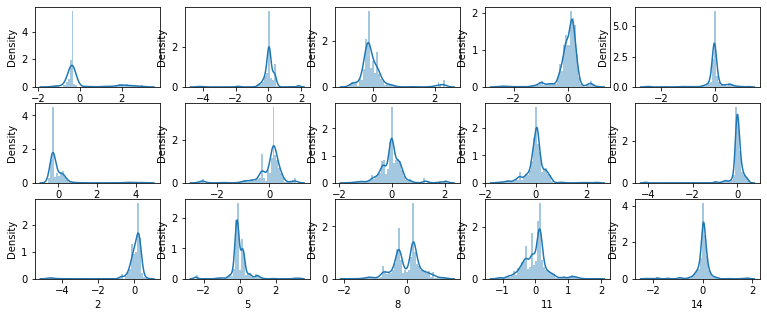

In [ ]:
fig,ax=plt.subplots(nrows=3,ncols=5)
fig.set_figheight(5)
fig.set_figwidth(13)


for i in range(5):
  one = 3*i + 0;
  one1 = 3*i + 1;
  one2 = 3*i + 2;
  sns.distplot(df[str(one)],ax=ax[0, i])
  sns.distplot(df[str(one1)],ax=ax[1, i])
  sns.distplot(df[str(one2)],ax=ax[2, i])

In [ ]:
# Run this at night for an hour top get the plots

# print("                                              add/non-ad  vs   Features")
# fig,ax=plt.subplots(nrows=1,ncols=1)
# fig.set_figheight(15)
# fig.set_figwidth(18)
# # sns.stripplot(y=1558,x=0,data=df,ax=ax[0])
# # sns.stripplot(y=1558,x=1,data=df,ax=ax[1])
# # sns.stripplot(y=1558,x=2,data=df,ax=ax[2])

# for i in range(1):
#   sns.stripplot(y = str(15), x = str(i), data = df, ax=ax[i])

# plt.show()

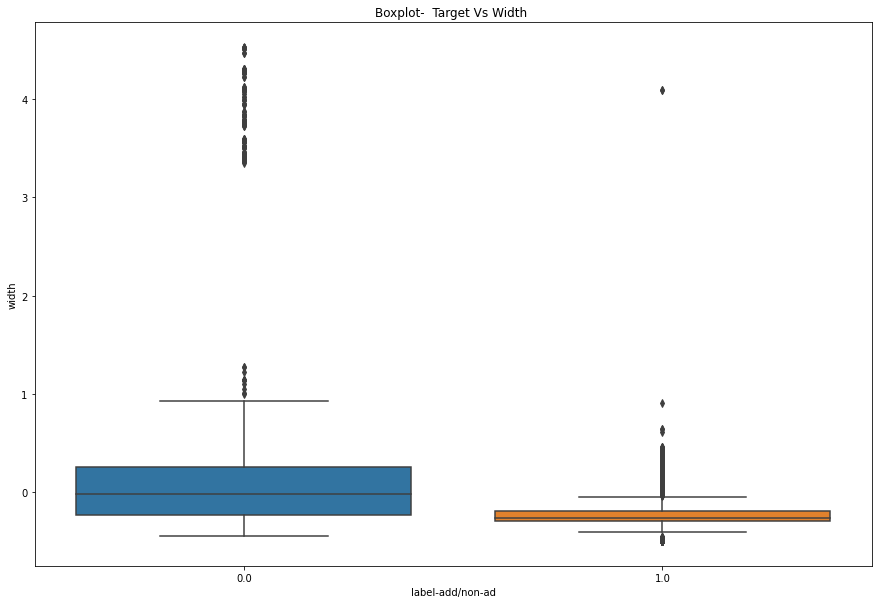

In [ ]:
# plt.figure(figsize=(15,10))
# sns.boxplot(x='15',y='1',data=df)
# plt.xlabel('label-add/non-ad')
# plt.ylabel('width')
# plt.title("Boxplot-  Target Vs Width ")
# plt.show()

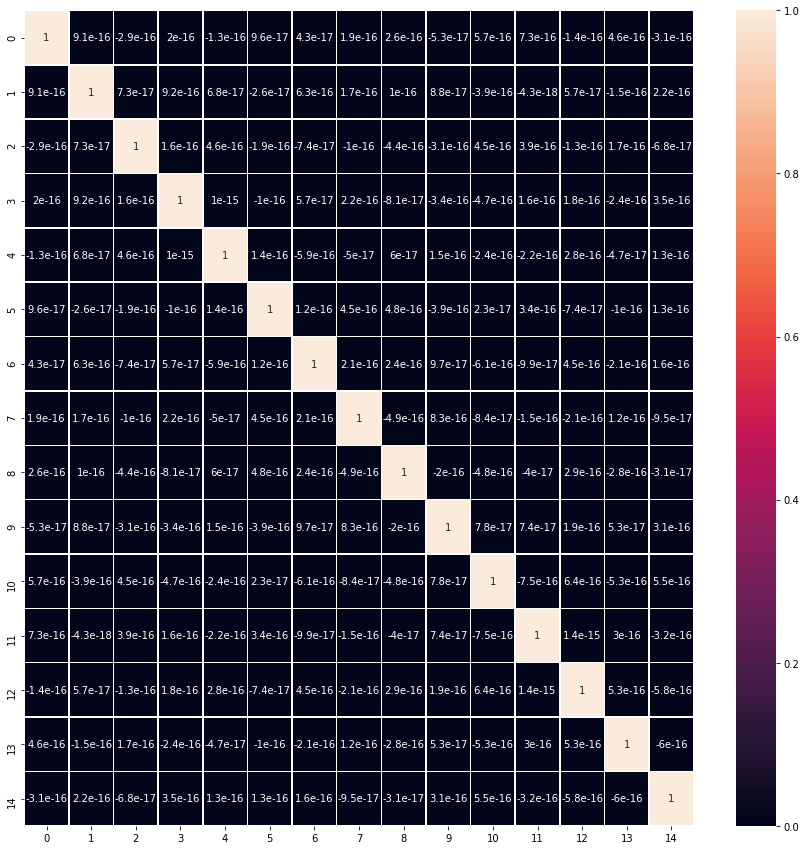

In [ ]:
# columns_for_visualization = list()
# for i in range(15):
#   columns_for_visualization.append(str(i))
# corr=df[columns_for_visualization].corr()
# fig, ax = plt.subplots(figsize=(15,15))
# sns.heatmap(corr,annot=True,linewidths=.5, ax=ax)

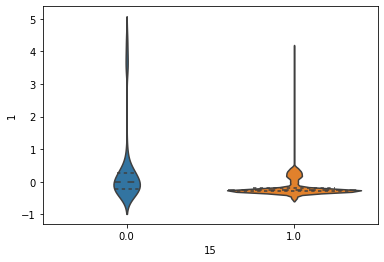

In [ ]:
# ax = sns.violinplot(x="15", y="1",data=df,split=True,inner="quart")

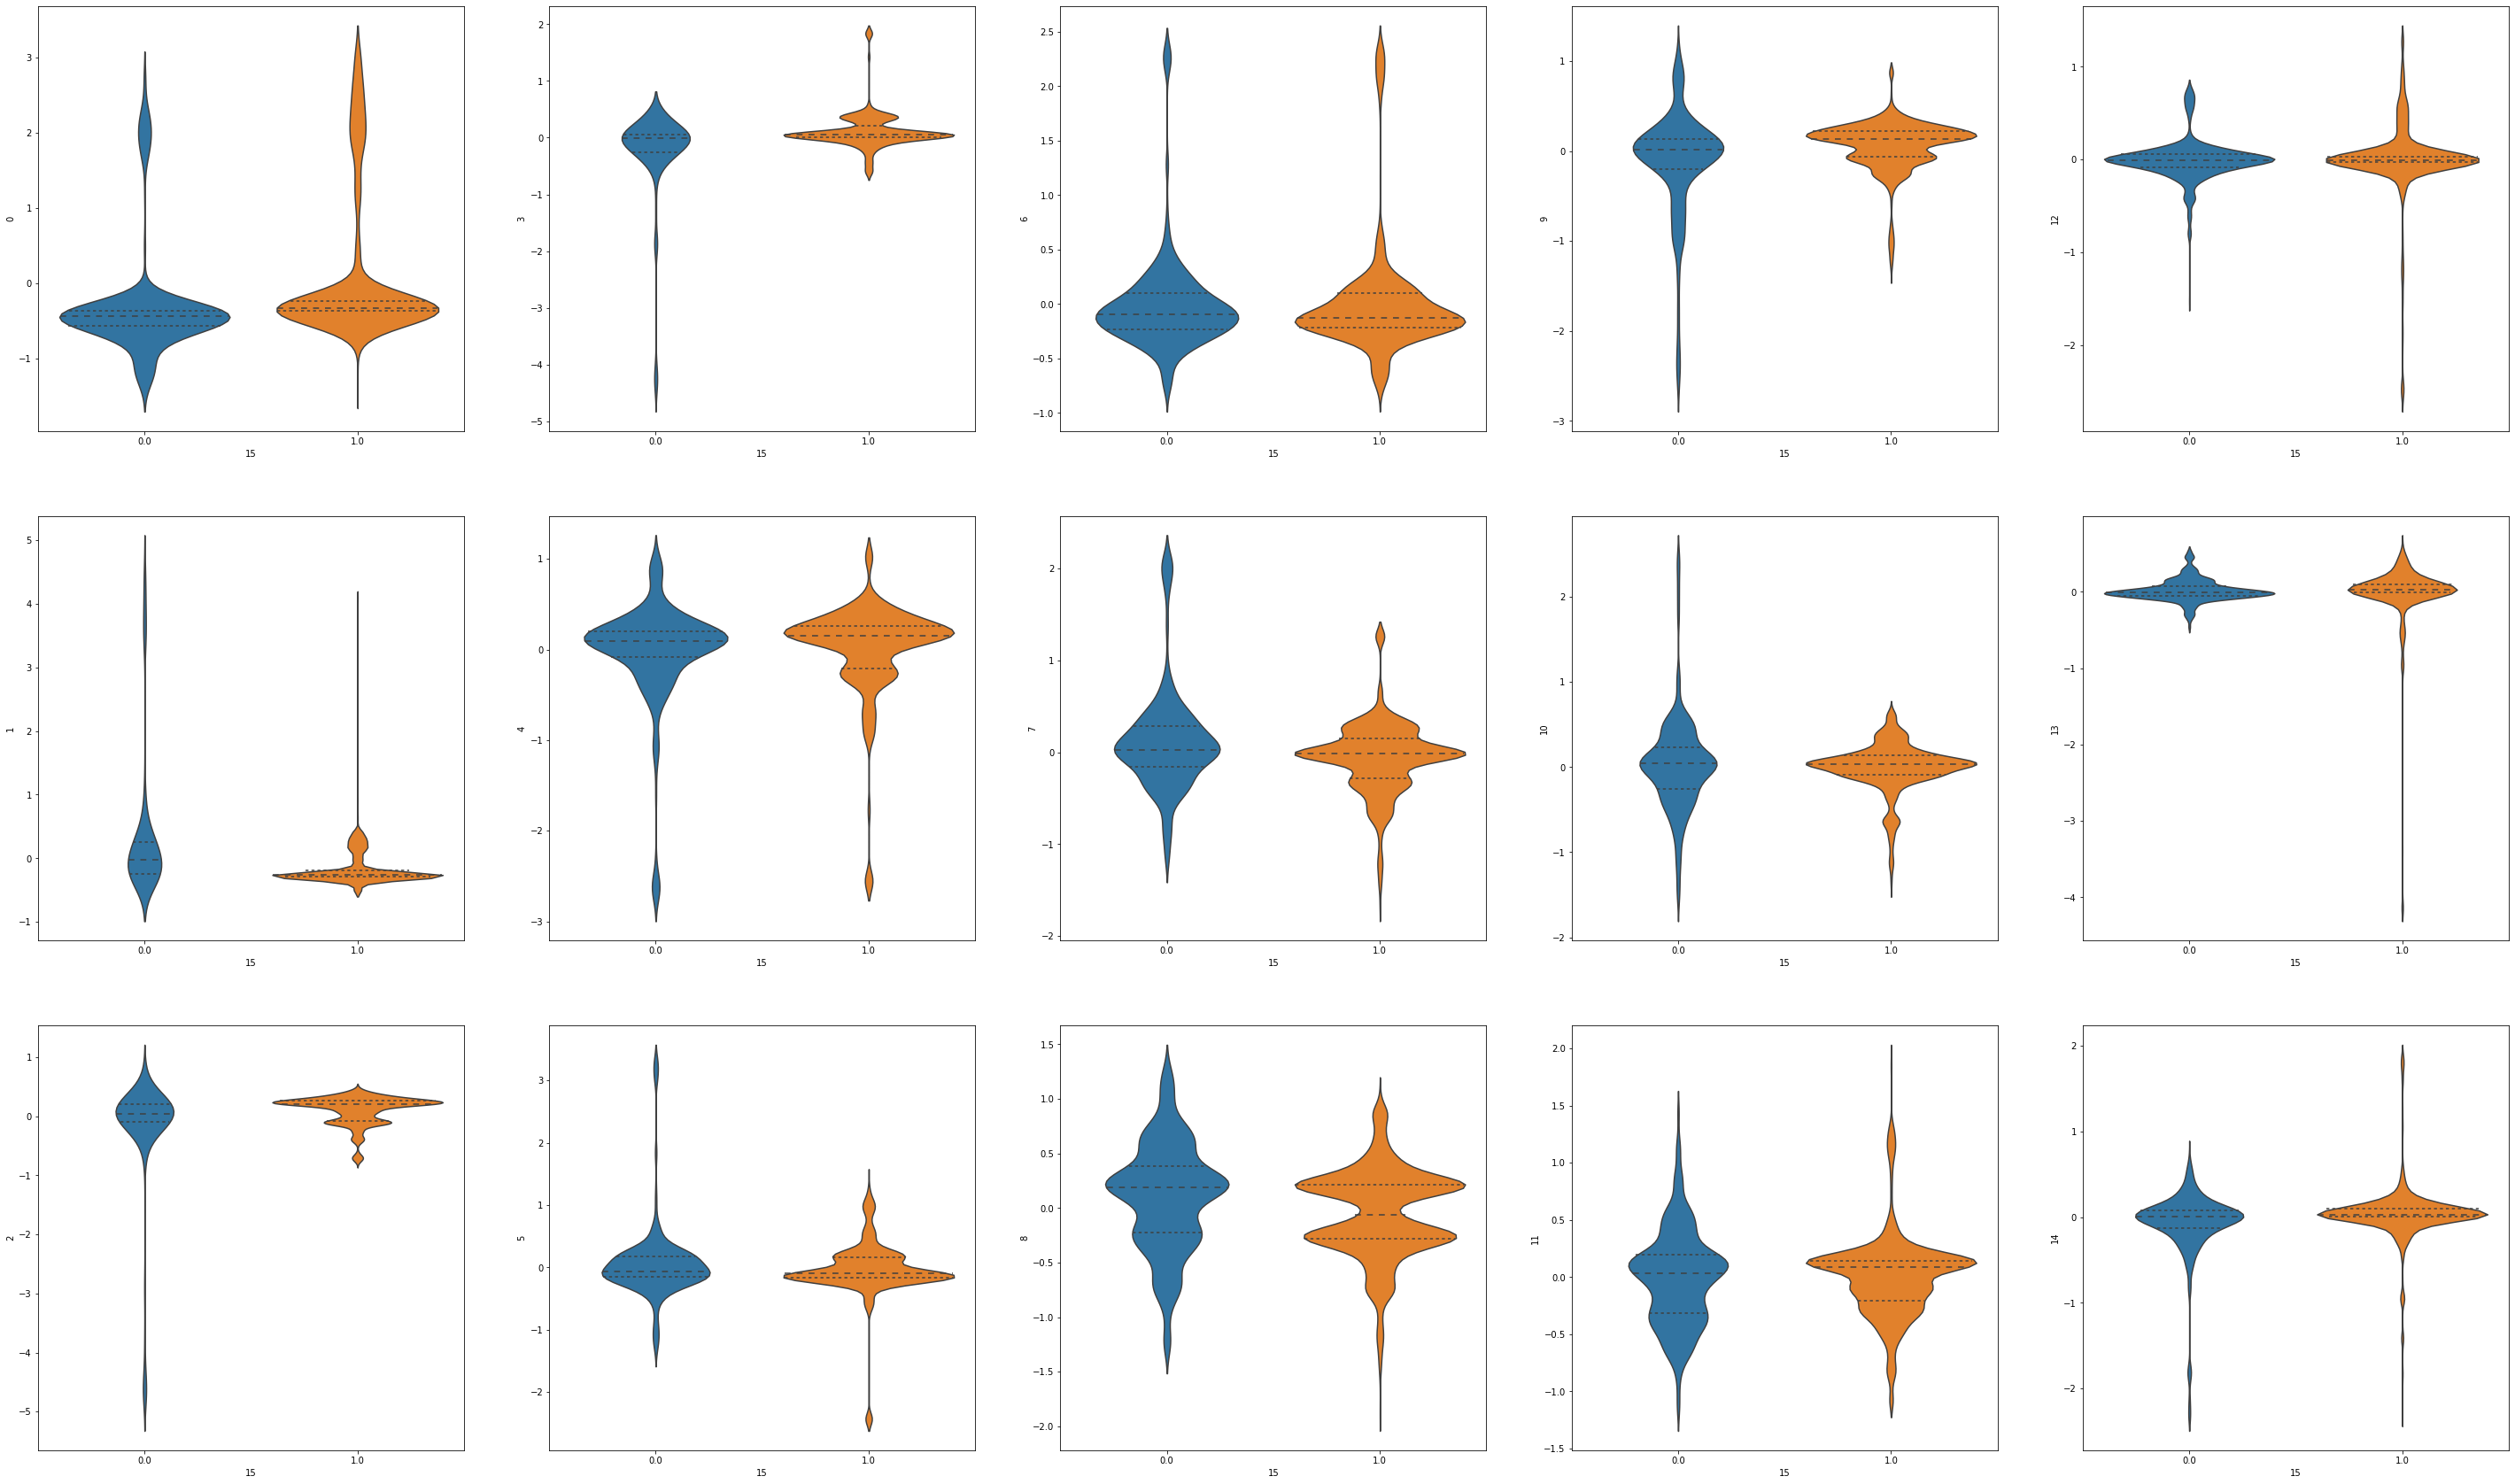

In [ ]:
fig,ax=plt.subplots(nrows=3,ncols=5)
fig.set_figheight(30)
fig.set_figwidth(50)


for i in range(5):
 one = 3*i + 0;
 one1 = 3*i + 1;
 one2 = 3*i + 2;
 sns.violinplot(x="15", y=str(one),data=df,split=True,inner="quart",ax=ax[0,i])
 sns.violinplot(x="15", y=str(one1),data=df,split=True,inner="quart",ax=ax[1,i])
 sns.violinplot(x="15", y=str(one2),data=df,split=True,inner="quart",ax=ax[2,i])

In [4]:
da=df.values
X=da[:,:-1]
y=da[:,-1]


xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.30,random_state=80)


In [ ]:
def fit_models(classifiers,xtrain,ytrain):
    """This function fit multiple models by sklearn and return the dictionary with values as  objects of models"""
    models=collections.OrderedDict()
    for constructor in classifiers:
        obj=constructor()
        obj.fit(xtrain,ytrain)
        models[str(constructor).split(':')[0]]=obj
    return models

def classification_multi_report(ytest,models_array):
    """This function generate classification accuracy report for given input model objects"""
    for i in models_array:
        print('__________________________________________________')
        print('the model - '+str(i))
        print(classification_report(ytest,models_array[i].predict(xtest)))
def cross_Function(models,cv):
    """This function return cross validated accuray and the variance of given input model obejects"""
    accuracy={}
    for model in models:
        cross_val_array=cross_val_score(models[model],xtrain,ytrain,scoring='accuracy',cv=cv)
        accuracy[model]=[np.mean(cross_val_array),np.std(cross_val_array)]
    return accuracy

def multi_grid_search(param_grid_array,estimator_list,x,y):
    """This function calculate the grid search parameters and accuracy  for given input modles and return dictionary with each tupple containing accuracy and best parameters"""
    d={}
    count=0
    for i in estimator_list:
        gc=GridSearchCV(estimator=estimator_list[i],param_grid=param_grid_array[count],scoring ='accuracy',cv=5).fit(x,y)
        d[i]=(gc.best_params_,gc.best_score_)
        count+=1
    return d

In [ ]:
classifiers=[SVC, KNeighborsClassifier, RandomForestClassifier, XGBClassifier, DecisionTreeClassifier]

# classifiers=[GaussianNB,SVC,KNeighborsClassifier]

model_list=fit_models(classifiers,xtrain,ytrain)

classification_multi_report(ytest,model_list)

__________________________________________________
the model - <class 'sklearn.svm._classes.SVC'>
              precision    recall  f1-score   support

         0.0       0.92      0.73      0.81       409
         1.0       0.88      0.97      0.92       824

    accuracy                           0.89      1233
   macro avg       0.90      0.85      0.87      1233
weighted avg       0.89      0.89      0.89      1233

__________________________________________________
the model - <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94       409
         1.0       0.97      0.96      0.97       824

    accuracy                           0.96      1233
   macro avg       0.95      0.95      0.95      1233
weighted avg       0.96      0.96      0.96      1233

__________________________________________________
the model - <class 'sklearn.ensemble._forest.RandomForestClassifier'>

In [ ]:

obj=cross_Function(model_list,cv=20)
for model in obj:
    print('the model -'+str(model)+'has \n || crosss validated accuracy as  -> '+str(obj[model][0])+' | variance - '+str(obj[model][1])+' ||' )
    print('______________________________________________________________________________________________________________')

the model -<class 'sklearn.svm._classes.SVC'>has 
 || crosss validated accuracy as  -> 0.8837582556332556 | variance - 0.028380616806913436 ||
______________________________________________________________________________________________________________
the model -<class 'sklearn.neighbors._classification.KNeighborsClassifier'>has 
 || crosss validated accuracy as  -> 0.9429292929292927 | variance - 0.01729310649644686 ||
______________________________________________________________________________________________________________
the model -<class 'sklearn.ensemble._forest.RandomForestClassifier'>has 
 || crosss validated accuracy as  -> 0.9718264374514375 | variance - 0.013620580970403267 ||
______________________________________________________________________________________________________________
the model -<class 'xgboost.sklearn.XGBClassifier'>has 
 || crosss validated accuracy as  -> 0.9460785742035739 | variance - 0.014197967441682975 ||
______________________________________

In [ ]:
param_grid_svm=[
  {
      
  }
]

param_grid_knn=[

    {   

        
    }
]

param_RandomForest = [
    {
        'n_estimators': np.arange(100, 500, 50),
        'max_depth' : np.arange(5, 35, 5)
    }
]

param_XGB=[
    {
        
    }
]

param_logit = [
  {
      
  }
]

param_XGBoost=[
    {

    }
]
param_dc = [
  {
      
  }
]
param_grid_array=[param_grid_svm, param_grid_knn, param_RandomForest, param_XGBoost, param_dc]
multi_grid_search(param_grid_array,model_list,xtrain,ytrain)

NameError: ignored

**Fitting model with best hyperparmater and cv score**

In [ ]:
classifier=RandomForestClassifier(max_depth = 20, n_estimators = 300)
classifier.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Confusion Matrix

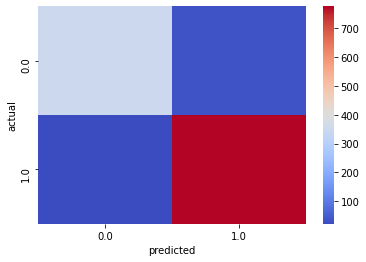

In [ ]:
sns.heatmap(pd.crosstab(ytest,classifier.predict(xtest)),cmap='coolwarm')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [ ]:
print(classification_report(ytest,classifier.predict(xtest)))


              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       409
         1.0       0.98      0.98      0.98       824

    accuracy                           0.98      1233
   macro avg       0.98      0.97      0.98      1233
weighted avg       0.98      0.98      0.98      1233



**NN karna hai**

In [5]:
#custom NN
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop,Adam

In [8]:
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.125, random_state=1)

In [41]:
#model params
model=Sequential()
model.add(Dense(30, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))
# model.add(Dense(200,activation='sigmoid',input_shape=(15,)))
# model.add(Dropout(0.2))
# model.add(Dense(300,activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(200,activation='sigmoid'))
# model.add(Dense(100,activation='sigmoid'))
model.add(Dense(30,activation='sigmoid'))
model.add(Dense(25,activation='sigmoid'))

# model.add(Dropout(0.2))
# model.add(Dense(20,activation='sigmoid'))
model.add(Dense(20,activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(25, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(10,activation='sigmoid'))

model.add(Dense(1, activation='sigmoid'))

In [42]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 30)                480       
_________________________________________________________________
dense_31 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_32 (Dense)             (None, 25)                775       
_________________________________________________________________
dense_33 (Dense)             (None, 20)                520       
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 21        
Total params: 2,726
Trainable params: 2,726
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy','AUC'])

# class_weights={0: 1,
#                 1:2.5,
#                 2: 5}
history = model.fit(X_train1, y_train1, batch_size=64, epochs=500, verbose=1, validation_data=(X_val, y_val))

Epoch 1/500
52/52 [==============================] - 1s 9ms/step - loss: 0.1391 - accuracy: 0.9577 - auc: 0.9804 - val_loss: 0.0981 - val_accuracy: 0.9732 - val_auc: 0.9913
Epoch 2/500
52/52 [==============================] - 0s 3ms/step - loss: 0.1140 - accuracy: 0.9697 - auc: 0.9868 - val_loss: 0.0992 - val_accuracy: 0.9757 - val_auc: 0.9907
Epoch 3/500
52/52 [==============================] - 0s 3ms/step - loss: 0.1220 - accuracy: 0.9635 - auc: 0.9845 - val_loss: 0.1033 - val_accuracy: 0.9635 - val_auc: 0.9915
Epoch 4/500
52/52 [==============================] - 0s 3ms/step - loss: 0.1337 - accuracy: 0.9592 - auc: 0.9815 - val_loss: 0.1169 - val_accuracy: 0.9538 - val_auc: 0.9909
Epoch 5/500
52/52 [==============================] - 0s 3ms/step - loss: 0.1352 - accuracy: 0.9587 - auc: 0.9832 - val_loss: 0.0965 - val_accuracy: 0.9781 - val_auc: 0.9916
Epoch 6/500
52/52 [==============================] - 0s 3ms/step - loss: 0.1267 - accuracy: 0.9606 - auc: 0.9824 - val_loss: 0.1046 - v

In [47]:
score = model.evaluate(X_test,y_test, verbose=1)
print(score)
print('Test accuracy:', score[1])

26/26 [==============================] - 0s 1ms/step - loss: 0.1663 - accuracy: 0.9526 - auc: 0.9709
[0.16627217829227448, 0.9525547623634338, 0.9709251523017883]
Test accuracy: 0.9525547623634338


In [45]:
model.save("ver1.9")

INFO:tensorflow:Assets written to: ver1.9/assets


In [48]:
from keras.models import load_model
prevModel = load_model('ver1.8')

In [51]:
score = prevModel.evaluate(X_train,y_train, verbose=1)
print(score)
print('Test accuracy:', score[1])

90/90 [==============================] - 0s 1ms/step - loss: 0.0939 - accuracy: 0.9687 - auc: 0.9929
[0.09390673786401749, 0.968684732913971, 0.9929434657096863]
Test accuracy: 0.968684732913971


In [50]:
prevModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                400       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                780       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 1,821
Trainable params: 1,821
Non-trainable params: 0
_________________________________________________________________


In [ ]:
!ls

 2018MT60795_it.pdf		   Synthetic_data.csv
'Colab Notebooks'		  'Untitled document.gdoc'
'Getting started.pdf'		  'Untitled presentation.gslides'
'iaw-edau-jme – 9 Feb 2021.gjam'   ver1.2
'ift-djtf-qko – 1 Mar 2021.gjam'   ver1.3
 pca_data.csv			   ver1.4
